## CDIPS

* [Bouma+2019](https://ui.adsabs.harvard.edu/abs/arXiv:1910.01133)
* [cdips](http://archive.stsci.edu/hlsp/cdips#section-782418b8-ab0e-47e4-8964-1ad2b8428379)
* [Galactocentric coordinates transform](https://docs.astropy.org/en/stable/coordinates/galactocentric.html)

In [1]:
%matplotlib inline
try:
    from tql import tql
except:
    from os.path import join 
    import sys
    import getpass
    username = getpass.getuser()
    sys.path.append(join('/home',username,'github/research/project/tql'))
    from tql import tql

import warnings 
warnings.filterwarnings("ignore", module='astropy.io.votable.tree')
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord, Distance
from scipy.stats.kde import gaussian_kde
import astropy.units as u

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


## TOIs near cluster

In [2]:
import pandas as pd

df = tql.get_clusters_Bouma2019()

In [6]:
tois = tql.get_tois(clobber=False)

Some parallax are negative, see [here](https://astronomy.stackexchange.com/questions/26250/what-is-the-proper-interpretation-of-a-negative-parallax) especially, [Lindegren+2018](https://arxiv.org/pdf/1804.09366.pdf) to properly deal with it.


_Spurious large positive and negative parallaxes_

The release
contains a small number of sources with very large positive or
negative parallaxes, for example, exceeding ±1 arcsec. These are
most likely produced by cross-matching issues, where the different observations of the same nominal source were matched to
different physical sources. In such cases, the proper motion will
in general also be corrupted. This, and the related question how
the data might be “cleaned”, is discussed in Appendix C. No filtering was made in the Gaia Archive based on the sizes of the
parallaxes and proper motions.

In [5]:
mem = tql.get_cluster_members_Bouma2019()

In [7]:
mem.shape

(1032797, 31)

In [8]:
mem.columns

Index(['source_id', 'reference', 'ext_catalog_name', 'ra', 'dec', 'pmra',
       'pmdec', 'parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'k13_name_match', 'unique_cluster_name',
       'how_match', 'not_in_k13', 'comment', 'k13_logt', 'k13_e_logt', 'gal_l',
       'gal_b', 'distance', 'gal_pm_b', 'gal_pm_l_cosb', 'X', 'Y', 'Z', 'U',
       'V', 'W', 'bp_rp', 'abs_gmag'],
      dtype='object')

In [9]:
groups = mem.groupby(by='unique_cluster_name')
len(groups)

3216

In [10]:
groups.groups.keys()

dict_keys(['118TAU', 'ABDMG', 'AH03_J0822-36.4', 'AH03_J1725-34.4', 'AH03_J2011+26.7', 'ASCC 93', 'ASCC_1', 'ASCC_10', 'ASCC_100', 'ASCC_101', 'ASCC_102', 'ASCC_103', 'ASCC_104', 'ASCC_105', 'ASCC_106', 'ASCC_107', 'ASCC_108', 'ASCC_109', 'ASCC_11', 'ASCC_110', 'ASCC_111', 'ASCC_112', 'ASCC_113', 'ASCC_114', 'ASCC_115', 'ASCC_116', 'ASCC_117', 'ASCC_118', 'ASCC_119', 'ASCC_12', 'ASCC_120', 'ASCC_121', 'ASCC_122', 'ASCC_123', 'ASCC_124', 'ASCC_125', 'ASCC_126', 'ASCC_127', 'ASCC_128', 'ASCC_129', 'ASCC_13', 'ASCC_130', 'ASCC_14', 'ASCC_15', 'ASCC_16', 'ASCC_17', 'ASCC_18', 'ASCC_19', 'ASCC_2', 'ASCC_20', 'ASCC_21', 'ASCC_22', 'ASCC_23', 'ASCC_24', 'ASCC_25', 'ASCC_26', 'ASCC_27', 'ASCC_28', 'ASCC_29', 'ASCC_3', 'ASCC_30', 'ASCC_31', 'ASCC_32', 'ASCC_33', 'ASCC_34', 'ASCC_35', 'ASCC_36', 'ASCC_37', 'ASCC_38', 'ASCC_39', 'ASCC_4', 'ASCC_40', 'ASCC_41', 'ASCC_42', 'ASCC_43', 'ASCC_44', 'ASCC_45', 'ASCC_46', 'ASCC_47', 'ASCC_48', 'ASCC_49', 'ASCC_5', 'ASCC_50', 'ASCC_51', 'ASCC_52', 'ASCC_5

Text(0.5, 1.0, 'Galactic')

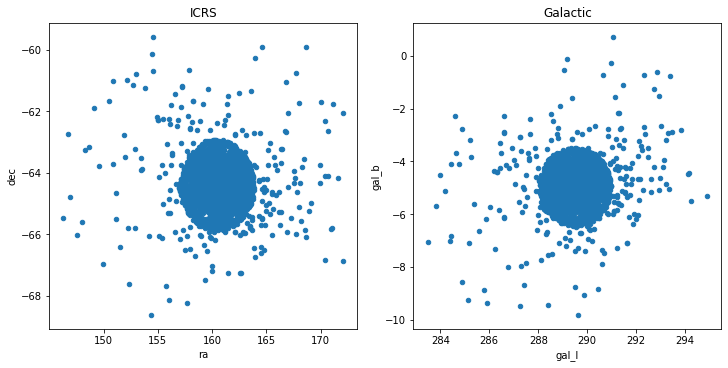

In [15]:
fig, ax = pl.subplots(1,2, figsize=(10,5), constrained_layout=True)

cname='IC_2602'
mem.loc[groups.groups[cname]].plot.scatter(x='ra',y='dec', ax=ax[0])
ax[0].set_title('ICRS')
mem.loc[groups.groups[cname]].plot.scatter(x='gal_l',y='gal_b', ax=ax[1])
ax[1].set_title('Galactic')

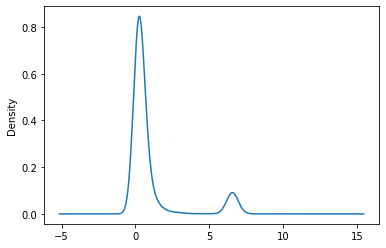

In [16]:
mem.loc[groups.groups[cname]]['parallax'].plot.kde()

In [17]:
mem.columns

Index(['source_id', 'reference', 'ext_catalog_name', 'ra', 'dec', 'pmra',
       'pmdec', 'parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'k13_name_match', 'unique_cluster_name',
       'how_match', 'not_in_k13', 'comment', 'k13_logt', 'k13_e_logt', 'bp_rp',
       'gal_l', 'gal_b', 'distance', 'gal_pm_b', 'gal_pm_l_cosb', 'X', 'Y',
       'Z', 'U', 'V', 'W', 'abs_gmag'],
      dtype='object')

## data with RV

In [17]:
from deepdish import io

cname = 'IC_2602'
gaia_data = io.load(f'../data/{cname}_members.hdf5')
df_gaia = pd.concat(gaia_data.values(), ignore_index=True)

In [18]:
df_gaia.source_id.shape

(317,)

In [19]:
df.loc[groups.groups[cname]].source_id.shape

(4621,)

In [20]:
df_gaia = df_gaia[df_gaia['parallax']>0]
icrs = SkyCoord(ra=df_gaia['ra'].values*u.deg, 
                dec=df_gaia['dec'].values*u.deg, 
                distance=Distance(parallax=df_gaia['parallax'].values*u.mas),
                radial_velocity=df_gaia['radial_velocity'].values*u.km/u.s,
                pm_ra_cosdec=df_gaia['pmra'].values*u.mas/u.yr,
                pm_dec=df_gaia['pmdec'].values*u.mas/u.yr,
                frame='fk5', 
                equinox='J2000.0')

#abs G magnitude
df_gaia['bp_rp']=df_gaia['phot_bp_mean_mag']-df_gaia['phot_rp_mean_mag']
df_gaia['abs_gmag'] = df_gaia['phot_g_mean_mag'] - \
                            5.*(np.log10(Distance(parallax=df_gaia['parallax'].values*u.mas).pc)) - 1
df_gaia['abs_gmag'].unit = u.mag

In [21]:
gal = icrs.transform_to('galactic')
df_gaia['gal_l'] = gal.l.deg
df_gaia['gal_b'] = gal.b.deg
df_gaia['distance'] = gal.distance
df_gaia['gal_pm_b'] = gal.pm_b
df_gaia['gal_pm_l_cosb'] = gal.pm_l_cosb
#galactocentric
xyz = icrs.galactocentric
df_gaia['X'] = xyz.x
df_gaia['Y'] = xyz.y
df_gaia['Z'] = xyz.z
df_gaia['U'] = xyz.v_x
df_gaia['V'] = xyz.v_y
df_gaia['W'] = xyz.v_z
df_gaia.head()

,source_id,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,...,gal_pm_b,gal_pm_l_cosb,X,Y,Z,U,V,W,bp_rp,abs_gmag
0,915553884118144,Zari_2018_UMS,915553884118144,45.408172,2.168272,-5.332160,-4.481473,2.163371,9.071013,9.128693,...,-6.935928,-0.639085,-8614.619311,26.975159,-310.530094,22.276784,232.681185,-3.134324,0.135307,-5.253332
1,1195551392247936,Zari_2018_UMS,1195551392247936,43.881549,2.018219,6.070629,-11.761800,6.101615,6.574962,6.582521,...,-4.342906,12.503265,-8408.788746,12.140681,-94.935768,12.513835,222.306152,4.999019,-0.045595,-5.497814
2,1402912413121792,Zari_2018_UMS,1402912413121792,44.375186,2.895904,7.408781,-14.308718,2.092020,10.367023,10.427338,...,-5.333147,15.204834,-8623.119544,38.130969,-323.145570,15.839152,196.981195,-0.963650,0.214413,-4.030147
3,1546703623466880,Zari_2018_UMS,1546703623466880,42.959304,2.920459,1.597504,1.721123,2.853298,10.033413,10.229258,...,2.348020,0.032962,-8531.840731,33.803099,-233.609312,8.222038,232.606961,9.858348,0.484987,-3.689851
4,1939920764151808,Zari_2018_PMS,1939920764151808,45.599782,3.707654,2.253568,-8.906024,8.919021,14.358600,15.910364,...,-4.879886,7.783479,-8377.842392,8.536990,-53.198020,12.491797,227.924422,5.438934,2.771015,3.110186


In [23]:
df_gaia.shape

(314, 109)

In [24]:
df_gaia = df_gaia[df_gaia.X<-8000]

In [ ]:
fig = tql.plot_rdp_pmrv(df_gaia, target_gaia_id=target_gaia_id);
fig.suptitle(cname)

Text(0.5, 0.98, 'IC_2602')

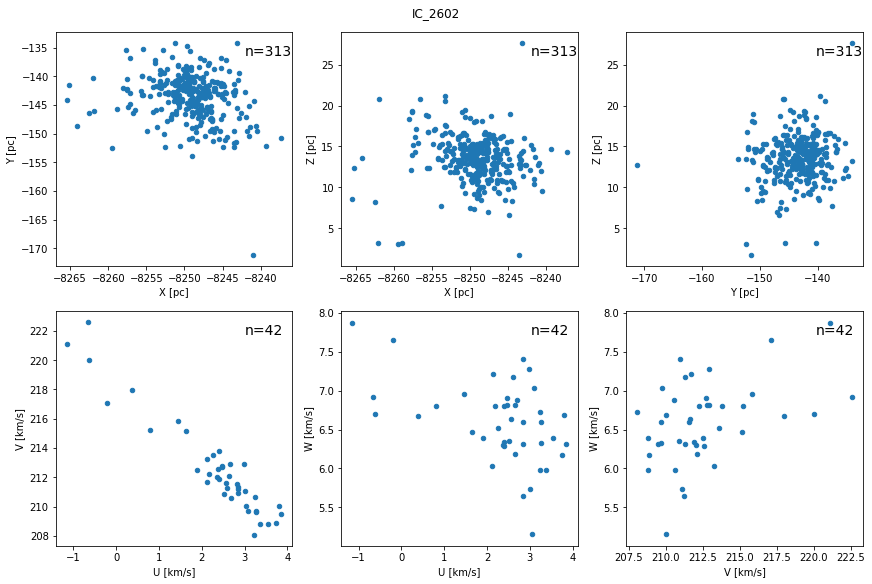

In [26]:
fig = tql.plot_xyz_uvw(df_gaia);
fig.suptitle(cname)

<Figure size 576x576 with 0 Axes>

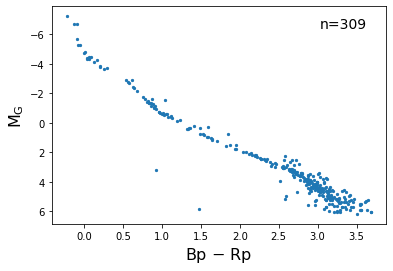

In [27]:
fig = tql.plot_hrd(df_gaia);

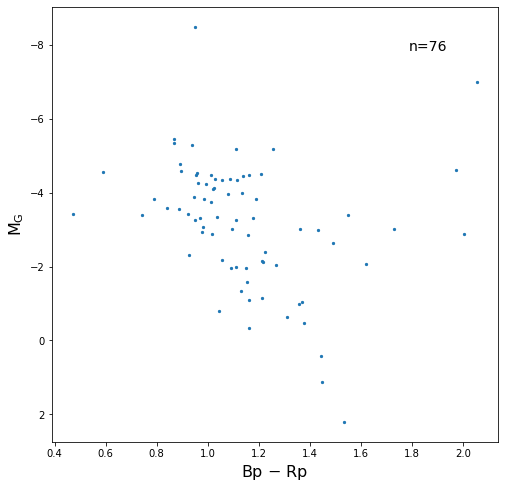

In [44]:
fig = tql.plot_hrd(df.loc[groups.groups[cname]]);

## TOI 1136

In [13]:
toi = tql.get_toi(toi=1136)
target_coord = SkyCoord(ra=toi['RA'].values[0],
                         dec=toi['Dec'].values[0],
                         unit=(u.hourangle,u.degree))
target_coord = tql.get_target_coord_3d(target_coord)

TOIs with TFPWG disposition==FP are removed.

Saved: ../data/TOIs.csv

Data from TOI Release:

                                       1136.01
Period (days)                          12.5187
Epoch (BJD)                        2.45869e+06
Duration (hours)                         4.178
Depth (ppm)                            1996.65
Comments          possible multi-planet system



In [59]:
#epic 
target_coord = SkyCoord(ra=136.157196*u.deg,
                        dec=19.714584*u.deg,
                        distance=Distance(parallax=4.74*u.mas))

In [67]:
distlimit = 20*u.pc
df[icrs.separation_3d(target_coord)<distlimit]#['unique_cluster_name']

,source_id,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,...,gal_pm_b,gal_pm_l_cosb,X,Y,Z,U,V,W,bp_rp,abs_gmag
230872,611424229930779904,Zari_2018_UMS,611424229930779904,133.719304,16.406484,7.828310,-22.948598,4.779879,9.498129,9.690749,...,-1.333092,24.210399,-8447.238209,-88.915448,146.041908,22.840139,211.283760,6.122491,0.489773,-3.104787
231399,661142393392058752,Kharchenko2013,385254225,131.132587,19.554758,-39.019964,-12.780643,4.700975,16.871496,18.469934,...,-41.032771,-1.488006,-8458.658414,-79.127429,144.486146,-10.051974,223.450889,-27.241959,2.849698,4.232436
231565,661335288963844736,Kharchenko2013,385247692,130.986181,19.725578,-36.969215,-13.754679,4.839839,12.879114,13.505226,...,-39.444595,0.194805,-8454.563306,-76.247127,140.904200,-7.947036,222.708072,-24.984030,1.365664,0.303268
232216,687235036973565568,Zari_2018_UMS,687235036973565568,137.968528,23.630848,-18.247646,-5.930707,4.870631,8.908608,9.032146,...,-19.178501,0.578790,-8441.670642,-63.579627,161.267308,0.179196,226.758948,-6.871979,0.308759,-3.653466


In [68]:
target_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (136.157196, 19.714584, 210.97046414)>

Text(0.5, 1.0, 'Galactic')

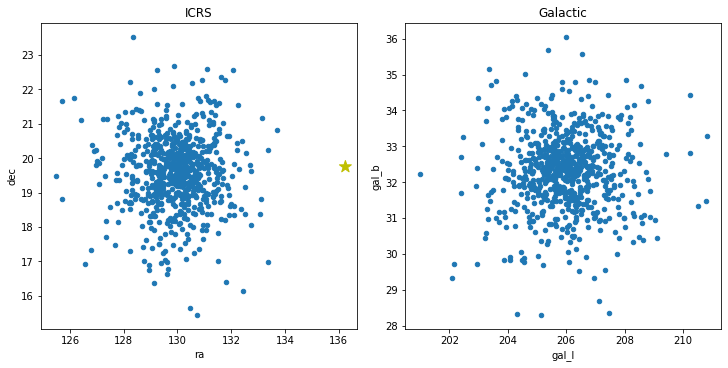

In [69]:
fig, ax = pl.subplots(1,2, figsize=(10,5), constrained_layout=True)

cname='NGC_2632'
df.loc[groups.groups[cname]].plot.scatter(x='ra',y='dec', ax=ax[0])
ax[0].set_title('ICRS')
ax[0].plot(target_coord.ra.deg, target_coord.dec.deg, 
           marker=r'$\star$', c='y', ms=16)
df.loc[groups.groups[cname]].plot.scatter(x='gal_l',y='gal_b', ax=ax[1])
ax[1].set_title('Galactic')

Text(0.5, 0.98, 'NGC_2632')

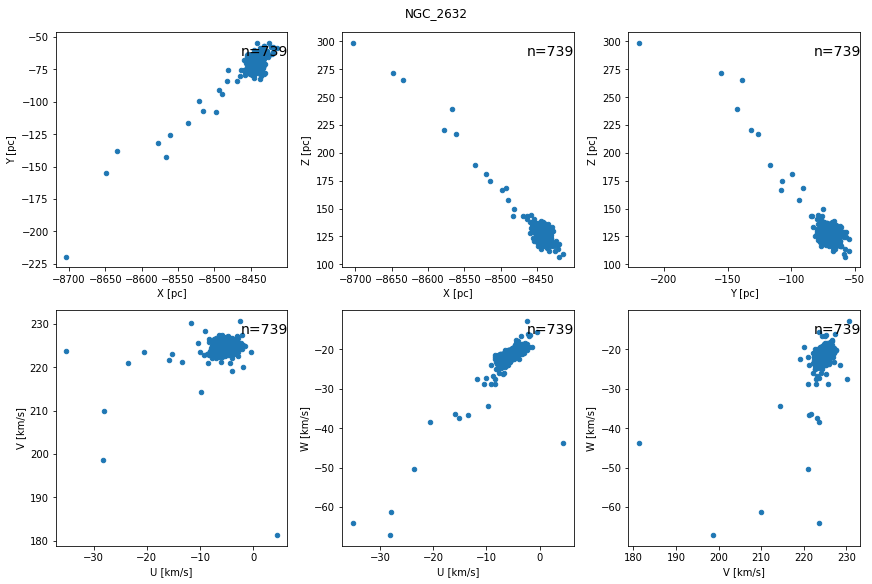

In [70]:
fig = plot_xyz_uvw(df.loc[groups.groups[cname]]);
fig.suptitle(cname)